In [36]:
import pandas as pd

df = pd.read_csv("Amazon Customer Behavior Survey.csv")
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

From the description of the dataset get on  https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset we are not interest in:

- Timestamp
- Service_Appreciation 
- Improvement_Areas 
- Rating_Accuracy 
- Personalized_Recommendation_Frequency 

In [37]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [38]:
df.drop(['Timestamp','Service_Appreciation','Improvement_Areas','Rating_Accuracy ', 'Personalized_Recommendation_Frequency'], inplace=True, axis = 1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   age                                     602 non-null    int64 
 1   Gender                                  602 non-null    object
 2   Purchase_Frequency                      602 non-null    object
 3   Purchase_Categories                     602 non-null    object
 4   Browsing_Frequency                      602 non-null    object
 5   Product_Search_Method                   600 non-null    object
 6   Search_Result_Exploration               602 non-null    object
 7   Customer_Reviews_Importance             602 non-null    int64 
 8   Add_to_Cart_Browsing                    602 non-null    object
 9   Cart_Completion_Frequency               602 non-null    object
 10  Cart_Abandonment_Factors                602 non-null    object
 11  Savefo

Except some int64, we have all object attribute.

In [40]:
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Shopping_Satisfaction                     0
dtype: int64

Since we have only 2 null values, we decide to remove the rows with null values

In [41]:
df.dropna(axis = 0, how = 'any', inplace = True)

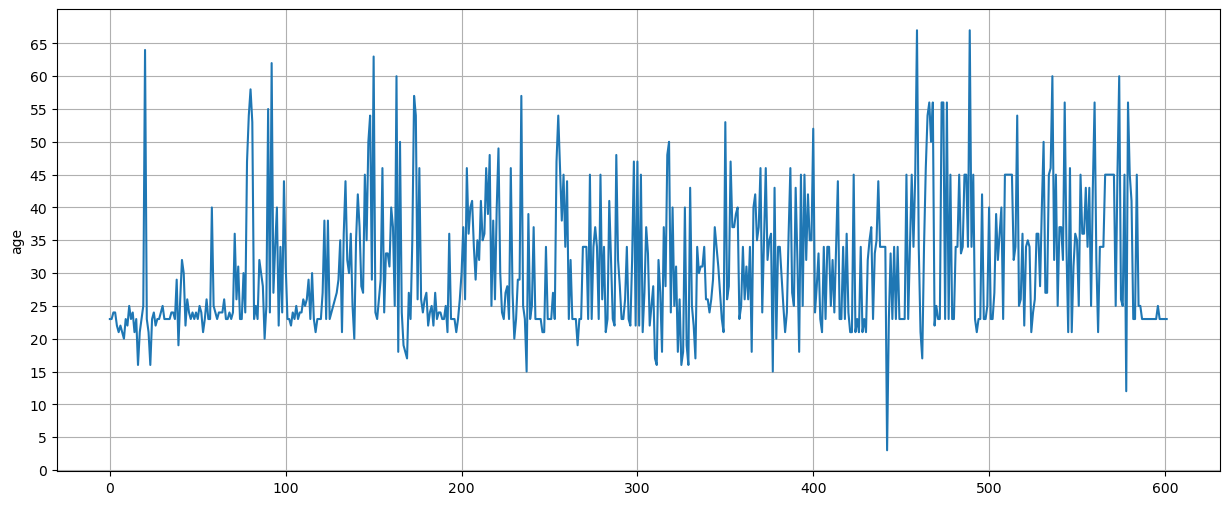

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))
plt.plot(df.age)
plt.yticks(np.arange(0, 70, 5.0))
plt.grid()
plt.ylabel("age")
plt.show()

We want to remove rows that contains age < 16

In [43]:
df.drop(df[df['age'] < 16].index, inplace = True)

In [44]:
categories = {
    1 : '1',
    2 : '2',
    3 : '3',
    4 : '4',
    5 : '5'
}

df['Customer_Reviews_Importance']=df['Customer_Reviews_Importance'].apply(lambda x : categories[x])
df['Personalized_Recommendation_Frequency ']=df['Personalized_Recommendation_Frequency '].apply(lambda x : categories[x])
df['Shopping_Satisfaction']=df['Shopping_Satisfaction'].apply(lambda x : categories[x])

In [45]:
def assign_category(row):
    
    age_categories = ['under20', '20-29', '30-39', '40-49', '50-59', 'over60' ]
    if row['age'] < 20 :
        return age_categories[0];
    elif row['age'] < 30 :
        return age_categories[1];
    elif row['age'] < 40 :
        return age_categories[2];
    elif row['age'] < 50 :
        return age_categories[3];
    elif row['age'] < 60 :
        return age_categories[4];
    else: 
        return age_categories[5];

df['age'] = df.apply(assign_category,axis = 1)

C:\Users\david\anaconda3\envs\DMML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

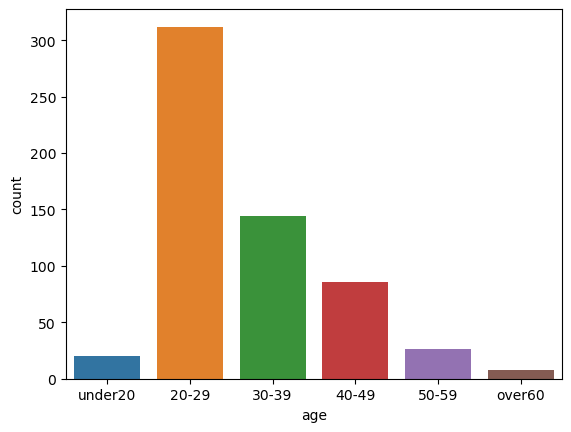

In [46]:
import seaborn as sns

order = ['under20', '20-29', '30-39', '40-49', '50-59', 'over60' ]
sns.countplot(df.age, order = order)

As we can see our dataset is unbalanced wrt the ages present

In [47]:
df = pd.get_dummies(df)

In [48]:
from mlxtend.frequent_patterns import fpgrowth
freq_itemset = fpgrowth(df, min_support=0.2,use_colnames=True,verbose = False)
freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x))
freq_itemset[(freq_itemset['length']>=2)&(freq_itemset['support']>= 0.3)]

C:\Users\david\anaconda3\envs\DMML\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
39,0.444631,"(Gender_Female, Search_Result_Exploration_Mult...",2
40,0.406040,"(age_20-29, Search_Result_Exploration_Multiple...",2
41,0.330537,"(age_20-29, Gender_Female)",2
43,0.412752,"(Review_Left_Yes, Search_Result_Exploration_Mu...",2
44,0.308725,"(Review_Left_Yes, Gender_Female)",2
48,0.389262,"(Cart_Completion_Frequency_Sometimes, Search_R...",2
49,0.308725,"(Cart_Completion_Frequency_Sometimes, Gender_F...",2
55,0.330537,(Cart_Abandonment_Factors_Found a better price...,2
60,0.318792,"(Saveforlater_Frequency_Sometimes, Search_Resu...",2
67,0.327181,"(Browsing_Frequency_Few times a week, Search_R...",2


In [49]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_itemset, metric="confidence", min_threshold=0.7)
rules["antecedentLength"] = rules["antecedents"].apply(lambda x: len(x))
rules = rules[rules["antecedentLength"] >= 1].sort_values(by='confidence', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedentLength
0,"(Review_Helpfulness_Yes, Add_to_Cart_Browsing_...",(Search_Result_Exploration_Multiple pages),0.265101,0.734899,0.234899,0.886076,1.205711,0.040077,2.326995,2
1,(Review_Helpfulness_Yes),(Search_Result_Exploration_Multiple pages),0.395973,0.734899,0.335570,0.847458,1.153162,0.044570,1.737882,1
2,(Add_to_Cart_Browsing_Yes),(Search_Result_Exploration_Multiple pages),0.359060,0.734899,0.303691,0.845794,1.150898,0.039818,1.719138,1
3,"(Review_Helpfulness_Yes, Gender_Female)",(Search_Result_Exploration_Multiple pages),0.248322,0.734899,0.209732,0.844595,1.149266,0.027240,1.705865,2
4,(Customer_Reviews_Importance_1),(Search_Result_Exploration_Multiple pages),0.280201,0.734899,0.236577,0.844311,1.148880,0.030657,1.702762,1
5,(Product_Search_Method_Keyword),(Search_Result_Exploration_Multiple pages),0.355705,0.734899,0.298658,0.839623,1.142500,0.037251,1.652981,1
6,"(Review_Helpfulness_Yes, age_20-29)",(Search_Result_Exploration_Multiple pages),0.263423,0.734899,0.219799,0.834395,1.135387,0.026209,1.600800,2
7,(Recommendation_Helpfulness_Yes),(Search_Result_Exploration_Multiple pages),0.261745,0.734899,0.216443,0.826923,1.125220,0.024087,1.531693,1
8,"(Review_Left_Yes, age_20-29)",(Search_Result_Exploration_Multiple pages),0.263423,0.734899,0.214765,0.815287,1.109385,0.021176,1.435200,2
9,"(Cart_Completion_Frequency_Sometimes, Review_L...",(Search_Result_Exploration_Multiple pages),0.256711,0.734899,0.208054,0.810458,1.102814,0.019397,1.398635,2


#### Thanks to https://www.kaggle.com/code/anotherbadcode/apriori-analysis/notebook, the starting point for the next cells

In [77]:
def validateMetric(rules, antecedents, consequents):
    """
    If Kulczynski is near 0 or 1, then we have an interesting rule that is negatively or positively associated respectively. 
    If Kulczynski is near 0.5, then we may or may not have an interesting rule.
    Imbalance Ratio where 0 is perfectly balanced and 1 is very skewed.
    So completely uninteresting rules would have both Kulczynski=0.5 and IR=0.
    
    Input : 
    rules : Dataset of rules
    antecedents : Antecedent(if) item, frozenset 
    consequents : Consequent(then) item, frozenset
    min_support : Value in order to prune candidate rules by specifying a minimum lower bound for the Support.
    Length : Antecedent Length   
    min_threshold : Threshold for Pruning
    metric : Confidence/Lift
    
    """
    PA = rules[(rules['antecedents'] == antecedents) & (rules['consequents'] == consequents)]
    kulczynski = round(0.5 * PA['support'].values[0] * \
                       ((1/PA['antecedent support'].values[0]) + (1/PA['consequent support'].values[0])), 4)

    IR = round((PA['antecedent support'].values[0] - PA['consequent support'].values[0])/ \
    (PA['antecedent support'].values[0] + PA['consequent support'].values[0] - PA['support'].values[0]) , 3)
    
    return kulczynski, abs(IR)


In [78]:
rules['Kulczynski'] = None
rules['IR'] = None
for i in range(0, len(rules['antecedents'])):
    rules['Kulczynski'][i], rules['IR'][i] = validateMetric(rules, antecedents=rules['antecedents'][i], consequents=rules['consequents'][i])
rules

C:\Users\david\AppData\Local\Temp\ipykernel_9420\1099237650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['Kulczynski'][i], rules['IR'][i] = validateMetric(rules, antecedents=rules['antecedents'][i], consequents=rules['consequents'][i])


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedentLength,Kulczynski,IR
0,"(Review_Helpfulness_Yes, Add_to_Cart_Browsing_...",(Search_Result_Exploration_Multiple pages),0.265101,0.734899,0.234899,0.886076,1.205711,0.040077,2.326995,2,0.6029,0.614
1,(Review_Helpfulness_Yes),(Search_Result_Exploration_Multiple pages),0.395973,0.734899,0.335570,0.847458,1.153162,0.044570,1.737882,1,0.652,0.426
2,(Add_to_Cart_Browsing_Yes),(Search_Result_Exploration_Multiple pages),0.359060,0.734899,0.303691,0.845794,1.150898,0.039818,1.719138,1,0.6295,0.476
3,"(Review_Helpfulness_Yes, Gender_Female)",(Search_Result_Exploration_Multiple pages),0.248322,0.734899,0.209732,0.844595,1.149266,0.027240,1.705865,2,0.565,0.629
4,(Customer_Reviews_Importance_1),(Search_Result_Exploration_Multiple pages),0.280201,0.734899,0.236577,0.844311,1.148880,0.030657,1.702762,1,0.5831,0.584
5,(Product_Search_Method_Keyword),(Search_Result_Exploration_Multiple pages),0.355705,0.734899,0.298658,0.839623,1.142500,0.037251,1.652981,1,0.623,0.479
6,"(Review_Helpfulness_Yes, age_20-29)",(Search_Result_Exploration_Multiple pages),0.263423,0.734899,0.219799,0.834395,1.135387,0.026209,1.600800,2,0.5667,0.606
7,(Recommendation_Helpfulness_Yes),(Search_Result_Exploration_Multiple pages),0.261745,0.734899,0.216443,0.826923,1.125220,0.024087,1.531693,1,0.5607,0.606
8,"(Review_Left_Yes, age_20-29)",(Search_Result_Exploration_Multiple pages),0.263423,0.734899,0.214765,0.815287,1.109385,0.021176,1.435200,2,0.5538,0.602
9,"(Cart_Completion_Frequency_Sometimes, Review_L...",(Search_Result_Exploration_Multiple pages),0.256711,0.734899,0.208054,0.810458,1.102814,0.019397,1.398635,2,0.5468,0.61


### Our rules are not very significant since we are very near to 0.5 almost in every row of the Dataset

We decide to keep only the ones with Kulczynski value greater than 0.6

Since the dataset is also  very screwed sometimes, we keep the rules with IRR lower than 0.5

In [82]:
rules = rules[(rules['Kulczynski'] > 0.6) & (rules['IR'] < 0.5)]
rules = rules.sort_values(by='Kulczynski', ascending=False).reset_index(drop=True)

In [104]:
with open("rules.txt", "a") as file:
    for i in range(0, len(rules['antecedents'])):
        list_ = [rules['antecedents'][i],rules['consequents'][i]]
        string = str([list(x) for x in list_][0]) + " --> " + str([list(x) for x in list_][0]) + "; Kulczynski = " + str(rules['Kulczynski'][i]) + "\n"
        
        file.write(string)